# <span style="color:red">APPLYING THE MODEL TO DATA TEST</span>

## <span style="color:blue">Apply on Data Test</span>

In [69]:
df_input = test.copy()

def assign_segment(row):
    if 26 <= row['Age'] < 36 and row['Type of job'] in ['admin.', 'technician', 'blue-collar', 'services'] and row['Marital status'] in ['married', 'single'] and row['Education'] in ['university.degree', 'high.school', 'basic.9y']:
        return 'A_Rising Achievers'
    elif 36 <= row['Age'] < 51 and row['Type of job'] in ['admin.', 'technician', 'blue-collar', 'services'] and row['Marital status'] in ['married'] and row['Education'] in ['university.degree', 'high.school', 'basic.9y']:
        return 'B_Established Professionals'
    elif 51 <= row['Age'] < 61 and row['Type of job'] in ['admin.', 'technician', 'blue-collar', 'retired', 'management'] and row['Marital status'] in ['married'] and row['Education'] in ['university.degree', 'high.school', 'basic.4y']:
        return 'C_Experienced Traditionalists'
    else:
        return 'Unassigned'

df_input['Segment'] = df_input.apply(assign_segment, axis=1)
print(f'Segment A_Rising Achievers: {df_input[df_input['Segment'] == 'A_Rising Achievers'].shape[0]} customers')
print(f'Segment B_Established Professionals: {df_input[df_input['Segment'] == 'B_Established Professionals'].shape[0]} customers')
print(f'Segment C_Experienced Traditionalists: {df_input[df_input['Segment'] == 'C_Experienced Traditionalists'].shape[0]} customers')
print(f'Unassigned: {df_input[df_input['Segment'] == 'Unassigned'].shape[0]} customers')

Segment A_Rising Achievers: 2509 customers
Segment B_Established Professionals: 1543 customers
Segment C_Experienced Traditionalists: 652 customers
Unassigned: 6767 customers


In [70]:
df_input_encoded = df_input.copy()
df_input_encoded = onehot_encoding(df_input_encoded)

missing_cols = set(X_trainDT.columns) - set(df_input_encoded.columns)
for col in missing_cols:
    df_input_encoded[col] = 0
df_input_encoded = df_input_encoded[X_trainDT.columns]

df_input_encoded['Segment'] = df_input['Segment']

print(df_input_encoded.shape)
print(X_trainDT.shape)
# df_input_encoded.info()

(11471, 47)
(18734, 46)


In [71]:
df_input_encoded['Proba_Buy'] = modelDT.predict_proba(df_input_encoded[X_trainDT.columns])[:,1]

df_input_encoded.groupby('Segment')['Proba_Buy'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A_Rising Achievers,2509.0,0.41,0.19,0.0,0.36,0.38,0.44,1.0
B_Established Professionals,1543.0,0.37,0.16,0.0,0.33,0.36,0.36,1.0
C_Experienced Traditionalists,652.0,0.40,0.20,0.0,0.36,0.36,0.40,1.0
Unassigned,6767.0,0.39,0.20,0.0,0.33,0.36,0.38,1.0


In [72]:
def predictedgroup(x):
    if x >= 0.8:
        return '1. High (>=0.8)'
    elif x >= 0.5:
        return '2. Medium (>=0.5)'
    elif x >= 0.2:
        return '3. Low (>=0.2)'
    else:
        return '4. Very low (>=0)'
        
df_input_encoded['Predicted group'] = df_input_encoded['Proba_Buy'].apply(predictedgroup)
df_input_encoded['Predicted group'].value_counts()

Predicted group
3. Low (>=0.2)       9277
1. High (>=0.8)       866
4. Very low (>=0)     771
2. Medium (>=0.5)     557
Name: count, dtype: int64

In [73]:
df_interactiontype = df_input_encoded[df_input_encoded["Segment"] != 'Unassigned'].groupby(['Segment', 'Predicted group'], observed=True)['Proba_Buy'].describe().round(3)
df_interactiontype

count   mean    std    min  \
Segment                       Predicted group                                  
A_Rising Achievers            1. High (>=0.8)     203.0  0.913  0.056  0.821   
                              2. Medium (>=0.5)   126.0  0.663  0.036  0.589   
                              3. Low (>=0.2)     2029.0  0.378  0.048  0.208   
                              4. Very low (>=0)   151.0  0.000  0.000  0.000   
B_Established Professionals   1. High (>=0.8)      72.0  0.906  0.052  0.825   
                              2. Medium (>=0.5)    42.0  0.712  0.045  0.616   
                              3. Low (>=0.2)     1354.0  0.347  0.028  0.272   
                              4. Very low (>=0)    75.0  0.000  0.000  0.000   
C_Experienced Traditionalists 1. High (>=0.8)      43.0  0.928  0.057  0.825   
                              2. Medium (>=0.5)    36.0  0.729  0.051  0.582   
                              3. Low (>=0.2)      527.0  0.366  0.065  0.232   
                              4. Very low (>=0)    46.0  0.000  0.000  0.000   

                                                   25%    50%    75%    max  
Segment                       Predicted group                                
A_Rising Achievers            1. High (>=0.8)    0.865  0.911  0.948  1.000  
                              2. Medium (>=0.5)  0.669  0.669  0.669  0.798  
                              3. Low (>=0.2)     0.363  0.363  0.442  0.496  
                              4. Very low (>=0)  0.000  0.000  0.000  0.000  
B_Established Professionals   1. High (>=0.8)    0.875  0.925  0.927  1.000  
                              2. Medium (>=0.5)  0.703  0.703  0.724  0.798  
                              3. Low (>=0.2)     0.330  0.363  0.363  0.441  
                              4. Very low (>=0)  0.000  0.000  0.000  0.000  
C_Experienced Traditionalists 1. High (>=0.8)    0.911  0.927  0.968  1.000  
                              2. Medium (>=0.5)  0.703  0.724  0.773  0.798  
                              3. Low (>=0.2)     0.363  0.363  0.363  0.496  
                              4. Very low (>=0)  0.000  0.000  0.000  0.000

In [74]:
df_interactiontype = df_interactiontype.reset_index()

## <span style="color:blue">Charts</span>

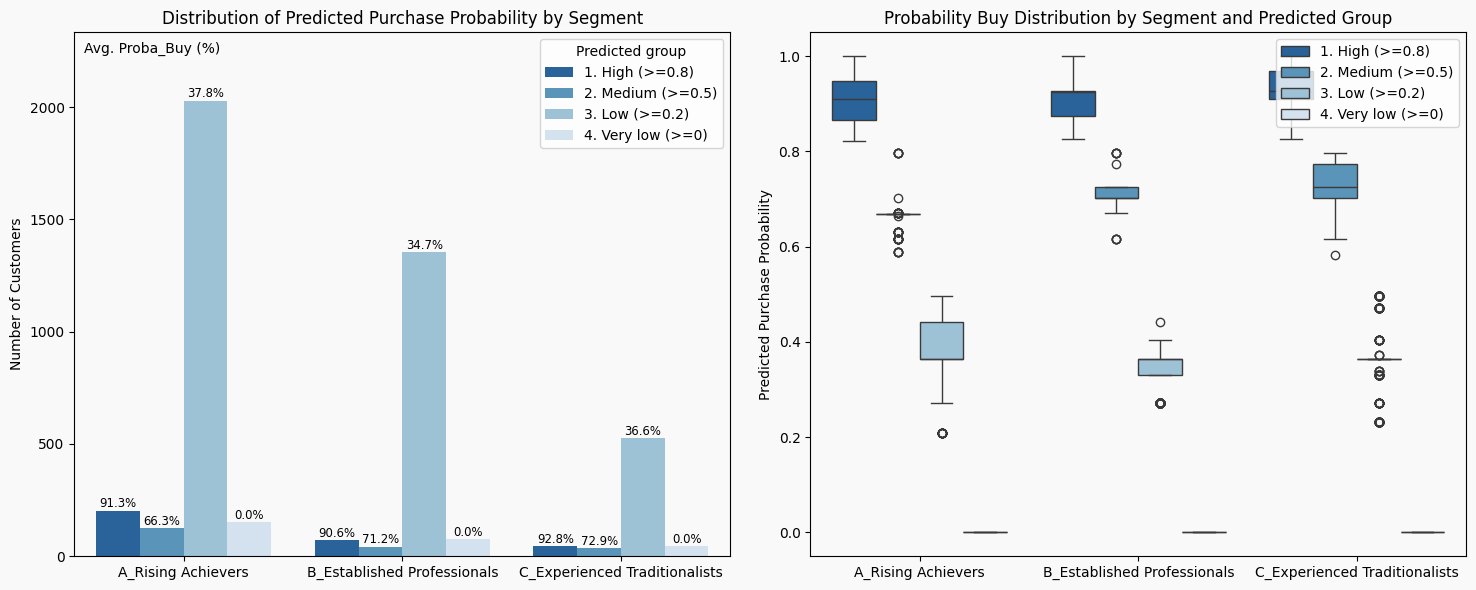

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart
palette = sns.color_palette("Blues", n_colors=4)[::-1]
sns.barplot(data=df_interactiontype, x='Segment', hue='Predicted group', y='count', ax=ax[0],
            hue_order= ['1. High (>=0.8)', '2. Medium (>=0.5)', '3. Low (>=0.2)', '4. Very low (>=0)'],
            order = ['A_Rising Achievers', 'B_Established Professionals', 'C_Experienced Traditionalists'], palette=palette)
ax[0].set_ylabel('Number of Customers')
ax[0].set_xlabel('')
countmean = dict(zip(df_interactiontype['count'], df_interactiontype['mean'].apply(lambda x: f'{round(x*100, 3)}%')))
for p in ax[0].patches:
    height = p.get_height()
    mean_score = countmean.get(height, "")
    ax[0].text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        mean_score,
        ha='center', va='bottom',
        fontsize='small', color='black')
ax[0].set_ylim(0, df_interactiontype['count'].max() * 1.15)
ax[0].text(
x=0.015, 
y=0.955,
s="Avg. Proba_Buy (%)",
transform=ax[0].transAxes,
fontsize="medium",
color="black",
ha="left",
va='bottom')
ax[0].set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')
ax[0].set_title('Distribution of Predicted Purchase Probability by Segment')

# Boxplot Chart
sns.boxplot(data=df_input_encoded[df_input_encoded['Segment'] != 'Unassigned'], x='Segment', y='Proba_Buy', ax=ax[1],
            hue='Predicted group', palette=palette, order=['A_Rising Achievers', 'B_Established Professionals', 'C_Experienced Traditionalists'],
            hue_order=['1. High (>=0.8)', '2. Medium (>=0.5)', '3. Low (>=0.2)', '4. Very low (>=0)'])
ax[1].set_title('Probability Buy Distribution by Segment and Predicted Group')
ax[1].set_xlabel('')
ax[1].set_ylabel('Predicted Purchase Probability')
plt.setp(ax[1].get_xticklabels(), fontsize=10)
ax[1].set_facecolor('#f9f9f9')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()